# Триангуляція Делоне

#### Підключаємо бібліотеки та функції, які необхідні для подальшої роботи 

In [3]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr

#### Функція для обчислення центру та радіусу кола, яке описане навколо трикутника. 

In [12]:
def getCircle(v1, v2, v3, e = 1.0e-6):
    temp = v2[0] * v2[0] + v2[1] * v2[1]
    bc = (v1[0] * v1[0] + v1[1] * v1[1] - temp) / 2
    cd = (temp - v3[0] * v3[0] - v3[1] * v3[1]) / 2
    
    determinant = ((v1[0] - v2[0]) * (v2[1] - v3[1]) 
                 - (v2[0] - v3[0]) * (v1[1] - v2[1]))

    if abs(determinant) < e:
        return (None, np.inf) # in case the 3 points form a line, returns (None, infinity).

    centerX = (bc * (v2[1] - v3[1]) 
             - cd * (v1[1] - v2[1])) / determinant
    centerY = (cd * (v1[0] - v2[0]) 
             - bc * (v2[0] - v3[0])) / determinant

    radius = np.sqrt((centerX - v1[0]) ** 2 + (centerY - v1[1]) ** 2)
    return ((centerX, centerY), radius)

In [5]:
def checkCondition(triangulation):
    vertecies = triangulation['vertices']
    triangles = triangulation['triangles']

    for triangle in triangles:
        v1 = vertecies[triangle[0]]
        v2 = vertecies[triangle[1]]
        v3 = vertecies[triangle[2]]
        center, radius = getCircle(v1, v2, v3)
        if center is not None:
            circle = plt.Circle(center, radius, clip_on = False)
            circle.set_edgecolor('0.75')
            circle.set_facecolor("none")
    
            plt.gcf().gca().add_artist(circle)


#### Задаємо координати точок трикутника та з'єднуємо їх між собою

In [8]:
initialPoints = np.array([[-3, 0], [0, 3], [3, 0], [0,0]]) 
seg =np.array([[0,1],[1,2],[2,3],[3,0]])
convexHull  = dict(vertices=initialPoints, segments = seg)

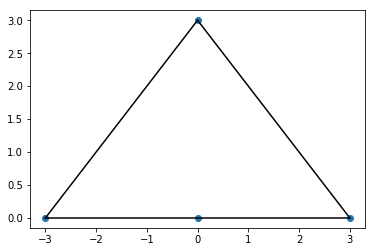

In [10]:
hull = ConvexHull(initialPoints)
plt.plot(initialPoints[:,0], initialPoints[:,1], 'o')
for simplex in hull.simplices:
  plt.plot(initialPoints[simplex,0], initialPoints[simplex,1], 'k-')
plt.show()

#### Приклади триангуляції для різних обмежень на величину кутів та площу сегментів

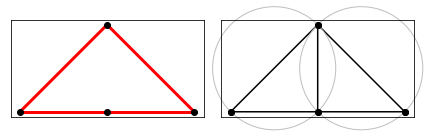

In [14]:
# Приклад 1
constraints='dq20a5' 

triangResult = tr.triangulate(convexHull, constraints)
tr.compare(plt, convexHull, triangResult)
checkCondition(triangResult)

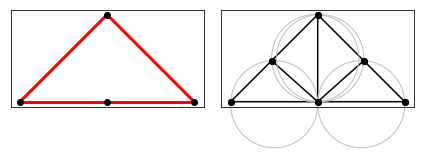

In [15]:
# Приклад 2
constraints='dq20a3' 

triangResult = tr.triangulate(convexHull, constraints)
tr.compare(plt, convexHull, triangResult)
checkCondition(triangResult)

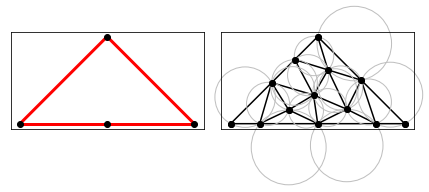

In [16]:
# Приклад 3
constraints='dq20a1' 

triangResult = tr.triangulate(convexHull, constraints)
tr.compare(plt, convexHull, triangResult)
checkCondition(triangResult)

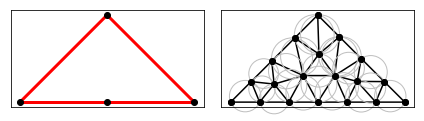

In [17]:
# Приклад 4
constraints='dq40a1' 

triangResult = tr.triangulate(convexHull, constraints)
tr.compare(plt, convexHull, triangResult)
checkCondition(triangResult)

##### Встановлення обмежень: 
###### q - значення для кута
###### а - значення для площі
###### d - індикатор триангуляції Делоне

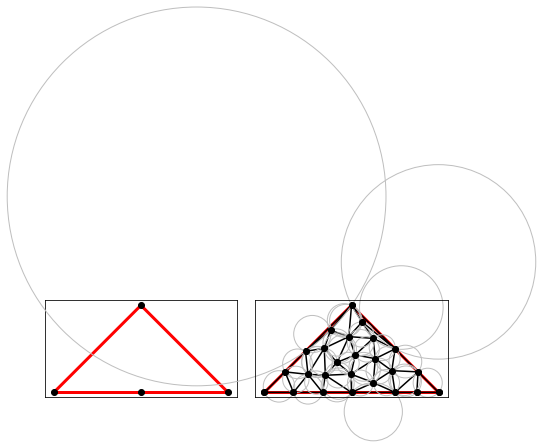

In [20]:
# Приклад 5
constraints=input('Enter area and angle constraints:') # dp30a0.4

triangResult = tr.triangulate(convexHull, constraints)
tr.compare(plt, convexHull, triangResult)
checkCondition(triangResult)

### Додаток

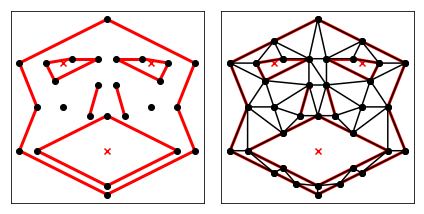

In [21]:
face = tr.get_data('face')
t = tr.triangulate(face, 'pq10')

tr.compare(plt, face, t)
plt.show()

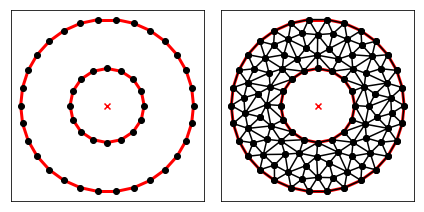

In [22]:
def circle(N, R):
    i = np.arange(N)
    theta = i * 2 * np.pi / N
    pts = np.stack([np.cos(theta), np.sin(theta)], axis=1) * R
    seg = np.stack([i, i + 1], axis=1) % N
    return pts, seg


pts0, seg0 = circle(30, 1.4)
pts1, seg1 = circle(16, 0.6)
pts = np.vstack([pts0, pts1])
seg = np.vstack([seg0, seg1 + seg0.shape[0]])

A = dict(vertices=pts, segments=seg, holes=[[0, 0]])
B = tr.triangulate(A, 'qpa0.05')
tr.compare(plt, A, B)
plt.show()